# Assignment 2.5

# **Hyoithesis Testing for SFO and LAX Marketing Campaigns**

## Part 1 - SFO

## Part 2 - LAX

## Part 3 - Conclusion


Author: Mia (Yuhsin Hou)

Class: ALY6015

# In this analysis, I will analyze the SFO and LAX data sets and determine if either marketing campaign was successful in raising the average miles driven per Uber driver.

# Import all libraries

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams


from scipy.stats import f_oneway


rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# **Part 1 - SFO**

# **1.1 - Data Acquisition and Simple Exploration**

## Load Data

In [0]:
# Read data from Google Sheet
SFO_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTwjTt9q4XsFNMG0iRbQXYs3Wy0_7BQ2fKGyfoj_8haKirgczXwmrH3O7W5QZbyIELWfdYSzNLq7lkq/pub?gid=163491843&single=true&output=csv"
sfo_df = pd.read_csv(SFO_data_path)

In [76]:
sfo_df.tail()

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
98,12/21/2019,7.957614,1
99,12/22/2019,65.703275,1
100,12/23/2019,100.402166,1
101,12/24/2019,106.037168,0
102,12/25/2019,104.130112,0


In [77]:
list(sfo_df)

['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

## Feature Definitions:
- Date: the date that the observation was recorded.
- SFO - Avg. Daily Miles Driven Per Hour: the avarage of daily miles driven per hour. 
- Marketing_Campaign: a binary field that is set to either 1 for when the marketing campaigns were active or 0 for when the marketing campaigns were deactivated.

## Test Setup:
- The Null Hypothesis (H0): the average daily miles driven per hour when the marketing campaign was in service is the same as the average daily miles driven per hour when the marketing campaign was not in action.

- The Alternate Hypothesis (H1): the average daily miles driven per hour when the marketing campaign was in service is greater than the average daily miles driven per hour when the marketing campaign was not in action.

The p-value will be set to .05

## SFO Quantitative Variable Overview

In [78]:
sfo_df.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,58.372330,0.281553
std,32.287660,0.451956
min,3.006834,0.000000
25%,35.583179,0.000000
50%,64.247011,0.000000
75%,83.372998,1.000000
max,133.053759,1.000000


## Remove Outliers

In [79]:
# Trimming off the outliers of the distribution.
starting_percentile = sfo_df['SFO - Avg. Daily Miles Driven Per Hour'].quantile(.01)
ending_percentile = sfo_df['SFO - Avg. Daily Miles Driven Per Hour'].quantile(.99)

print("Starting percentile: ", starting_percentile)
print("Ending percentile: ", ending_percentile)

Starting percentile:  3.9653772535
Ending percentile:  114.04905323600003


The outliers are loaded into a dataframe for future analysis. 

A summary of the dataframe contents can be found below.

In [80]:
sfo_df_outliers = sfo_df.loc[((sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] <= starting_percentile) | (sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] >= ending_percentile))]
sfo_df_outliers['SFO - Avg. Daily Miles Driven Per Hour'].describe().to_frame()

,SFO - Avg. Daily Miles Driven Per Hour
count,4.000000
mean,63.553627
std,69.800031
min,3.006834
25%,3.707725
50%,59.076958
75%,118.922861
max,133.053759


Create a dataframe that has the outliers removed.

In [81]:
sfo_df_trimmed = sfo_df.loc[((sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] > starting_percentile) & (sfo_df['SFO - Avg. Daily Miles Driven Per Hour'] < ending_percentile))]
sfo_df_trimmed.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,99.000000,99.000000
mean,58.162985,0.272727
std,30.573836,0.447628
min,5.142456,0.000000
25%,39.216422,0.000000
50%,64.247011,0.000000
75%,83.081313,1.000000
max,106.037168,1.000000


## Avg Daily Miles Driven Per Hour Distribution

<Figure size 1656x576 with 0 Axes>

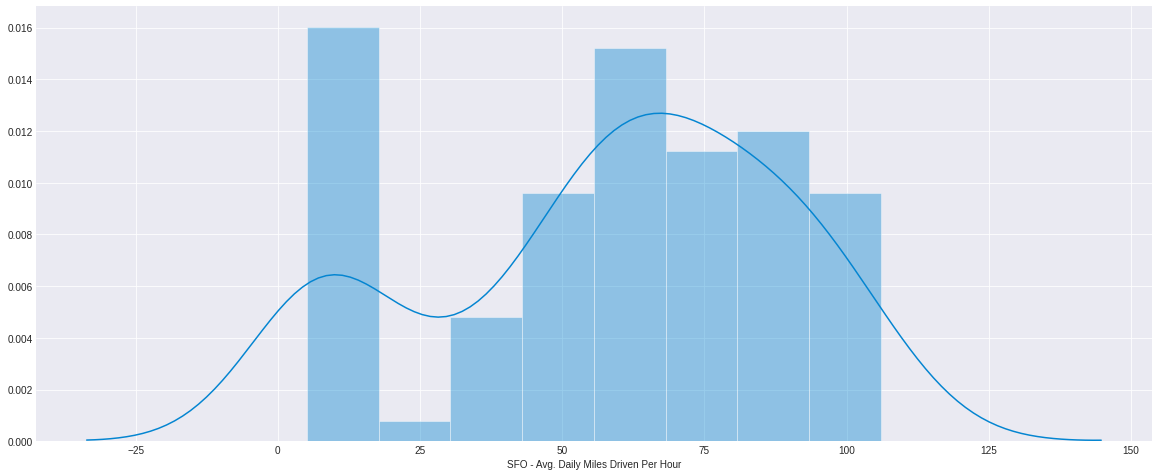

<Figure size 1656x576 with 0 Axes>

In [82]:
# Make a distribution plot.
ax = sns.distplot(sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'], bins = 8, color = '#0485d1')
plt.figure(figsize=(23,8))

## Avg Daily Miles Driven Per Hour & Marketing Campaign Distribution

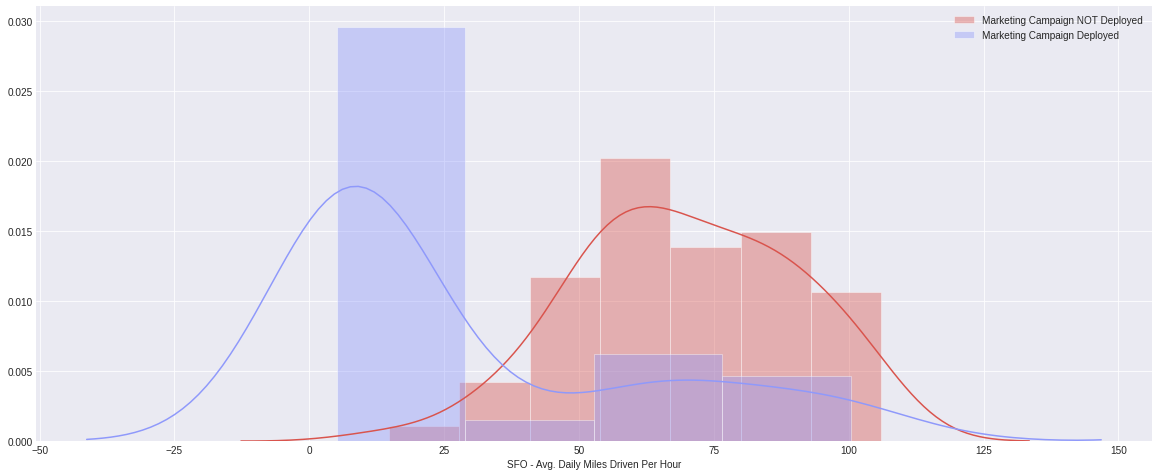

In [83]:
data0 = sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_df_trimmed['Marketing_Campaign'] == 0]
data1 = sfo_df_trimmed['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo_df_trimmed['Marketing_Campaign'] == 1]

ax = sns.distplot(data0, hist = True, color = '#d9544d')
ax = sns.distplot(data1, hist = True, color = '#8f99fb') 
plt.legend(['Marketing Campaign NOT Deployed', 'Marketing Campaign Deployed'])

In [84]:
data0

0       85.300304
1       99.224113
2       71.076322
3       96.756869
4       52.003619
          ...    
69      55.196785
70      52.718725
71      47.357358
101    106.037168
102    104.130112
Name: SFO - Avg. Daily Miles Driven Per Hour, Length: 72, dtype: float64

# **1.2 Hypothesis Testing Result** 

In [85]:
# Compare samples
stat, p = f_oneway(data0, data1)
print('Statistics = %.3f, p = %.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics = 61.635, p = 0.000
Different distributions (reject H0)


# **Part 2 LAX**

# **2.1 - Data Acquisition and Simple Exploration**

## Load Data

In [0]:
# Read data from Google Sheet
LAX_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRV-hUcGafl3RgN254Zr9DiapxuQKy58m5LDn7gZh6KFFsnG11q318Nwb3X-VXGCjhRen2RjuP9yimB/pub?gid=868165226&single=true&output=csv"
lax_df = pd.read_csv(LAX_data_path)

In [87]:
lax_df.tail()

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
98,12/04/2019,222.963140,1
99,12/19/2019,232.826538,1
100,12/11/2019,233.716260,1
101,12/05/2019,242.065610,1
102,12/06/2019,251.119602,1


In [88]:
list(lax_df)

['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

## Feature Definitions:
- Date: The date that the observation was recorded.
- LAX - Avg. Daily Miles Driven Per Hour: The avarage of daily miles driven per hour.
- Marketing_Campaign: A binary field that is set to either 1 for when the marketing campaigns were active or 0 for when the marketing campaigns were deactivated.

## Test Setup:
- The Null Hypothesis (H0): the average daily miles driven per hour when the marketing campaign was in service is the same as the average daily miles driven per hour when the marketing campaign was not in action.

- The Alternate Hypothesis (H1): the average daily miles driven per hour when the marketing campaign was in service is greater than the average daily miles driven per hour when the marketing campaign was not in action.

The p-value will be set to .05

## LAX Quantitative Variable Overview

In [89]:
lax_df.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,115.740345,0.291262
std,61.052778,0.456566
min,-78.841975,0.000000
25%,77.972315,0.000000
50%,115.991378,0.000000
75%,156.862219,1.000000
max,251.119602,1.000000


**The feature of 'LAX - Avg. Daily Miles Driven Per Hour' contains negative numbers, which are considered as outliers.**

## Remove Outliers

In [90]:
lax_starting_percentile = lax_df['LAX - Avg. Daily Miles Driven Per Hour'].quantile(.03)
lax_ending_percentile = lax_df['LAX - Avg. Daily Miles Driven Per Hour'].quantile(.99)
print("Starting percentile: ", lax_starting_percentile)
print("Ending percentile: ", lax_ending_percentile)

Starting percentile:  2.1661233850000006
Ending percentile:  241.89862250000007


The outliers are loaded into a dataframe for future analysis. 

A summary of the dataframe contents can be found below.

In [91]:
lax_df_outliers = lax_df.loc[((lax_df['LAX - Avg. Daily Miles Driven Per Hour'] <= lax_starting_percentile) | (lax_df['LAX - Avg. Daily Miles Driven Per Hour'] >= lax_ending_percentile))]
lax_df_outliers['LAX - Avg. Daily Miles Driven Per Hour'].describe().to_frame()

,LAX - Avg. Daily Miles Driven Per Hour
count,6.000000
mean,63.234801
std,144.733785
min,-78.841975
25%,-23.120385
50%,-3.454124
75%,181.922893
max,251.119602


Create a new dataframe that has outliers removed. 

In [92]:
lax_df_trimmed = lax_df.loc[((lax_df['LAX - Avg. Daily Miles Driven Per Hour'] > lax_starting_percentile) & (lax_df['LAX - Avg. Daily Miles Driven Per Hour'] < ending_percentile))]
lax_df_trimmed.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,44.000000,44.000000
mean,72.696628,0.181818
std,26.797170,0.390154
min,12.684422,0.000000
25%,54.919692,0.000000
50%,77.972315,0.000000
75%,95.331284,0.000000
max,112.761516,1.000000


## Avg Daily Miles Driven Per Hour Distribution

<Figure size 1656x576 with 0 Axes>

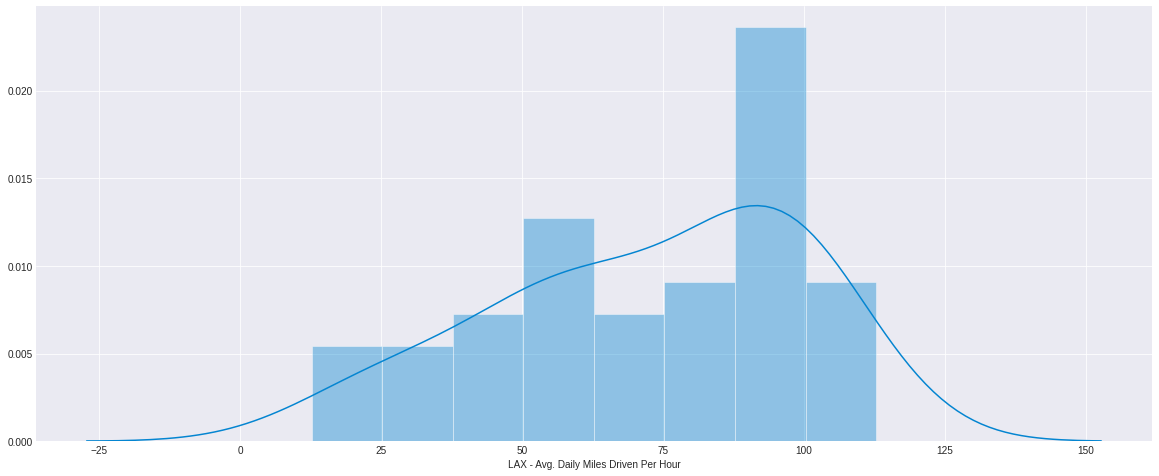

<Figure size 1656x576 with 0 Axes>

In [93]:
ax = sns.distplot(lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'], bins = 8, color = '#0485d1')
plt.figure(figsize=(23,8))

## Avg Daily Miles Driven Per Hour & Marketing Campaign Distribution

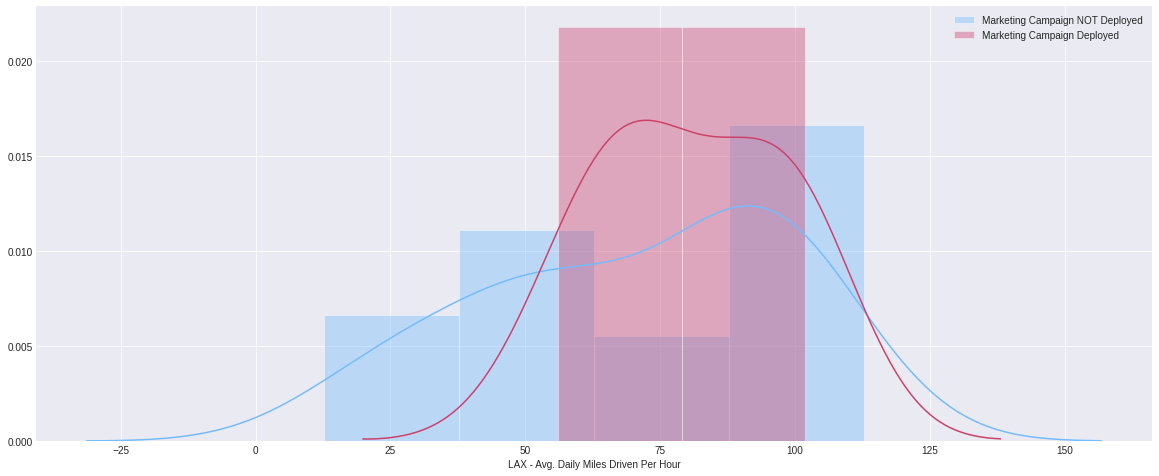

In [94]:
data2 = lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_df_trimmed['Marketing_Campaign'] == 0]
data3 = lax_df_trimmed['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_df_trimmed['Marketing_Campaign'] == 1]

ax = sns.distplot(data2, hist = True, color = '#75bbfd') 
ax = sns.distplot(data3, hist = True, color = '#cb416b') 
plt.legend(['Marketing Campaign NOT Deployed', 'Marketing Campaign Deployed'])

In [95]:
data2

4      12.684422
5      22.193877
6      23.014184
7      27.985561
8      31.215784
9      37.140945
10     43.086183
11     43.896901
12     49.446477
13     49.645010
14     51.553516
16     56.532929
17     59.339844
18     60.606210
19     60.709901
20     61.511462
24     74.050376
25     77.612384
26     78.332246
27     78.978413
28     82.147571
30     89.355010
31     89.834985
32     90.219550
33     91.129120
34     92.198142
35     94.731985
36     94.863301
38     98.027433
39     98.086304
40     98.557990
42    100.214622
44    103.886019
45    104.448050
46    111.598548
47    112.761516
Name: LAX - Avg. Daily Miles Driven Per Hour, dtype: float64

# **2.2 Hypothesis Testing Result**

In [97]:
# Compare samples
stat, p = f_oneway(data2, data3)
print('Statistics = %.3f, p = %.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics = 0.910, p = 0.345
Same distributions (fail to reject H0)


# **Part 3 - Conclusion**

## Q1. Analyze the SFO and LAX data sets and determine if either marketing campaign was successful in raising the average miles driven per Uber driver.

For SFO dataset:  
- The result is p = 0.000. If the p-value is less than 0.05, we reject the null hypothesis. Meaning that marketing campaign **does not help in raising the average miles driven per Uber driver.**
- However, I found that even the null hypothesis was rejected, alternative hypothesis was not supported. On the contrary, the distribution plot shows that **the average daily miles driven per hour when the marketing campaign was in service is less than the average daily miles driven per hour when the marketing campaign was not in action.** How does this happened? I assume that is because we only consider the relationship between average mile and marketing campaign. There are other features affecting the average miles driven per Uber driver. For future work, we should consider other factors. (refer below Q2)

For LAX dataset: 

- The result is p =  0.345. If the p-value is greater than 0.05, **we failed to reject the null hypothesis. The distribution plot shows that marketing campaign was successful in raising the average miles driven per Uber driver.**




## Q2. What factors may affect the validity of this study?
 
- Weather: sunny day or rainy day might bringing a variation in the average miles driven per Uber driver. On a rainy day, probably more people taking Uber or not taking Uber, that affect the average mile driven by per driver. 
- Time: weekday, weekend, and holiday season may impact. For example, the average miles driven per Uber driver may increase, during weekend or holiday season, since more people or tourists ride Uber.
- Economic: during economic recession, the number of rides might decreased, which reducing the average miles driven per Uber driver.
- Competitors: if the competitors such as Lyft or Carpool services appear and offer the coupons or lower pricing may impact the average miles driven per Uber driver.

